In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


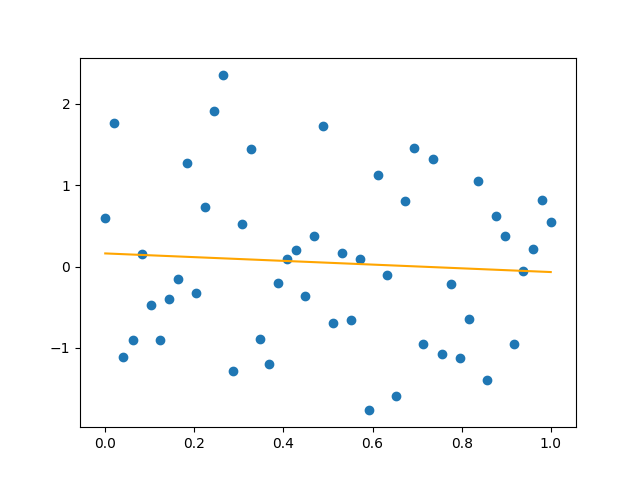

In [3]:
fig, ax = plt.subplots()

In [4]:
x = np.linspace(0, 1)
y = np.random.normal(size=len(x))

In [5]:
ax.scatter(x, y)

In [6]:
model = LinearRegression()
model.fit(np.expand_dims(x, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_, model.intercept_

(array([-0.22884197]), 0.16127098128584183)

In [8]:
y_hat = model.predict(np.expand_dims(x, 1))

In [9]:
ax.plot(x, y_hat, color="orange")

# PCA

In [10]:
import sklearn.decomposition

<IPython.core.display.Javascript object>


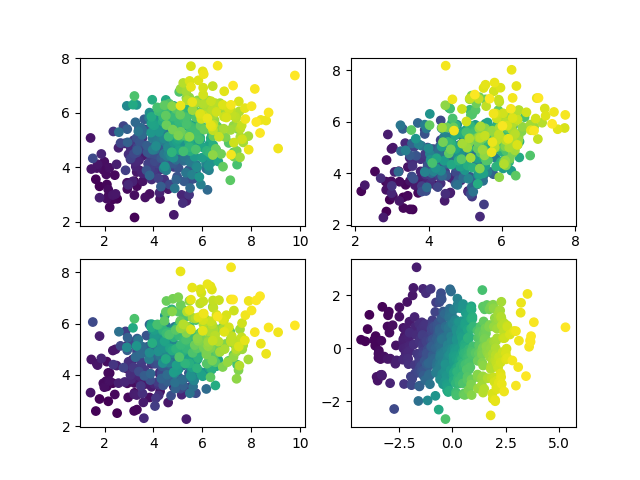

In [11]:
fig, axs = plt.subplots(2, 2)

In [12]:
for ax in fig.get_axes():
    ax.clear()
# plt.close("all")

In [13]:
# original data
n_points = 500
mean = (5, 5, 5)
cov = np.array([[2, .5, .5], [.5, 1, .5], [.5, .5, 1]])
data = np.random.multivariate_normal(mean, cov, size=n_points)

# indexes of points ordered by distance to 0
indexes = np.argsort(np.apply_along_axis(np.linalg.norm, 1, data))

In [14]:
# plot some canonical projections
ss = ((0, 0, 0, 1), (0, 1, 1, 2), (1, 0, 0, 2))
for i, j, d1, d2 in ss:
    axs[i][j].clear()
    axs[i][j].scatter(data[indexes, d1], data[indexes, d2], c=list(range(len(indexes))))

In [15]:
# PCA
pca = sklearn.decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data)

In [16]:
axs[1, 1].clear()
axs[1, 1].scatter(data_pca[indexes, 0], data_pca[indexes, 1], c=list(range(len(indexes))))

# PCA 2

In [17]:
import sklearn.decomposition

<IPython.core.display.Javascript object>


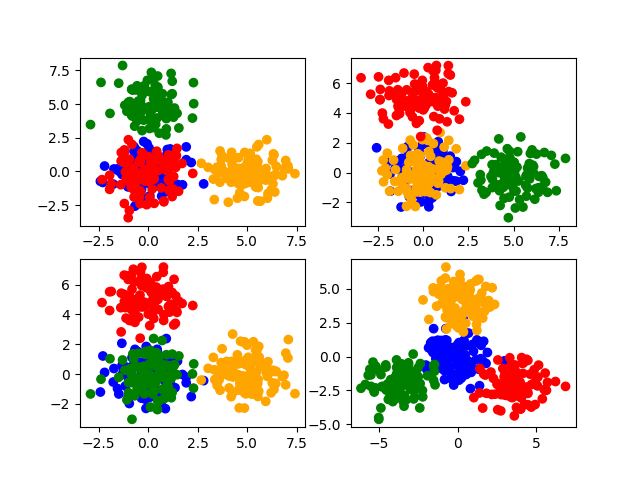

In [18]:
fig, axs = plt.subplots(2, 2)

In [19]:
# original data
n_points = 100
mean0 = (0, 0, 0)
mean1 = (5, 0, 0)
mean2 = (0, 5, 0)
mean3 = (0, 0, 5)
cov = np.eye(3)
data = np.concatenate((
    np.random.multivariate_normal(mean0, cov, size=n_points),
    np.random.multivariate_normal(mean1, cov, size=n_points),
    np.random.multivariate_normal(mean2, cov, size=n_points),
    np.random.multivariate_normal(mean3, cov, size=n_points),
))
colors = (["blue" for _ in range(n_points)] 
          + ["orange" for _ in range(n_points)] 
          + ["green" for _ in range(n_points)] 
          + ["red" for _ in range(n_points)])
# plot some canonical projections
ss = ((0, 0, 0, 1), (0, 1, 1, 2), (1, 0, 0, 2))
for i, j, d1, d2 in ss:
    axs[i][j].clear()
    axs[i][j].scatter(data[:, d1], data[:, d2], c=colors)

In [20]:
# PCA
pca = sklearn.decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data)
# plot
axs[1, 1].clear()
axs[1, 1].scatter(data_pca[:, 0], data_pca[:, 1], c=colors)